In [1]:
#Task 1: Data Preparation
# "You will start by loading the CSV data from the file (using appropriate pandas functions) and checking whether the loaded data is equivalent to the data in the source CSV file.
# Then, you need to clean the data by using the knowledge we taught in the lectures. You need to deal with all the potential issues/errors in the data appropriately (such as: typos, extra whitespaces, sanity checks for impossible values, and missing values etc). "
# Please structure code as follows: 
# Always provide one line of comments to explain the purpose of the code, e.g. load the data, checking the equivalent to original data, checking typos (do this for each other types of errors)

# Code goes after this line by adding cells


#Import the pandas and numpy library
import pandas as pd
import numpy as np

#Task 1.1:Data Retrieving
#Load the csv file in the dataframe
#Change the headers to much easier names and start the data by skiping the starting 2 unwanted rows
data_file="StarWars.csv"
starwars=pd.read_csv(data_file,skiprows=2,sep=',', header= None, names=["respondant_id","seen_any","fan_starwars","seen_ep1","seen_ep2","seen_ep3","seen_ep4","seen_ep5","seen_ep6","rate_ep1","rate_ep2","rate_ep3","rate_ep4","rate_ep5","rate_ep6","rate_han","rate_luke","rate_leia","rate_anakin","rate_obi","rate_palpatine","rate_darth","rate_lando","rate_boba","rate_c3p0","rate_r2d2","rate_binks","rate_amidala","rate_yoda","who_shot_first","exp_uni","fan_exp_uni","fan_startrek","gender","age","income","education","location"])

#Check value counts of each column for finding possible errors in the data.
for i in starwars.columns:
     print(starwars[i].value_counts(dropna=False))  


3289370623    1
3290063543    1
3289539921    1
3290206907    1
3291022013    1
             ..
3289861464    1
3289481310    1
3290944858    1
3288653149    1
3289878528    1
Name: respondant_id, Length: 1186, dtype: int64
Yes     935
No      250
Yes       1
Name: seen_any, dtype: int64
Yes     551
NaN     350
No      283
Noo       1
Yess      1
Name: fan_starwars, dtype: int64
Star Wars: Episode I  The Phantom Menace    673
NaN                                         513
Name: seen_ep1, dtype: int64
NaN                                            615
Star Wars: Episode II  Attack of the Clones    571
Name: seen_ep2, dtype: int64
NaN                                            636
Star Wars: Episode III  Revenge of the Sith    550
Name: seen_ep3, dtype: int64
Star Wars: Episode IV  A New Hope    607
NaN                                  579
Name: seen_ep4, dtype: int64
Star Wars: Episode V The Empire Strikes Back    758
NaN                                             428
Name: seen_ep5, 

In [2]:
#Task 1.2: Correcting data types
mapping = {
    "Star Wars: Episode I  The Phantom Menace": "Yes",
    "Star Wars: Episode II  Attack of the Clones": "Yes",
    "Star Wars: Episode III  Revenge of the Sith": "Yes",
    "Star Wars: Episode IV  A New Hope": "Yes",
    "Star Wars: Episode V The Empire Strikes Back": "Yes",
    "Star Wars: Episode VI Return of the Jedi": "Yes",
}
for i in starwars.columns[3:9]:
    starwars[i] = starwars[i].map(mapping)

In [3]:
#Task 1.3: Typos
starwars["fan_starwars"].replace({"Noo": "No", "Yess": "Yes"}, inplace=True)
starwars["fan_exp_uni"].replace({"Yess": "Yes"}, inplace=True)
starwars["fan_startrek"].replace({"Noo": "No"}, inplace=True)
starwars["gender"].replace({"F":"Female"},inplace=True)

In [4]:
#Task 1.4: Extra-whitespaces
starwars["seen_any"] = starwars["seen_any"].str.strip()

In [5]:
#Task 1.5: Upper/Lower-case
starwars["gender"].replace({"female":"Female","male":"Male"},inplace=True)
starwars["fan_startrek"].replace({"yes": "Yes","no":"No"}, inplace=True)

In [6]:
#Task 1.6: Sanity checks
starwars["age"].replace({"500":starwars["age"].mode()[0]},inplace=True)

In [7]:
#Task 1.7 : Missing values

#Drop rows who have 35 or more null values as they do no contribute any information to the objective of task 2
#Create a duplicate dataframe called copy so that the original is not affected
copy=starwars           
df=copy.isnull().sum(axis=1)
index1=df[df>34].index
copy.drop(index1,inplace=True)

#Null values from fan_stawars to seen_ep6
for i in copy.columns[2:9]:
    copy[i] = copy[i].fillna('No')
    copy.loc[copy['seen_any'] == 'No', i] = "Not seen starwars"

In [8]:
#Null Values from rate_ep1 to rate_ep6
for i in copy.columns[9:15]:
    copy[i].fillna(copy[i].mode()[0], inplace=True)
    copy.loc[copy['seen_any'] == 'No', i] = "Not seen starwars"

In [9]:
#Null values from rate_han to rate_yoda
for i in copy.columns[15:29]:
    copy[i].fillna(copy[i].mode()[0], inplace=True)
    copy.loc[copy['seen_any'] == 'No', i] = "Not seen starwars"

In [10]:
#Null values of who_shot_first
copy.loc[copy['seen_any'] == 'No', 'who_shot_first'] = "Not seen starwars"
copy["who_shot_first"].fillna("I don't understand this question", inplace=True)

#Null Values of exp_uni
copy.loc[copy['seen_any'] == 'No', 'exp_uni'] = "Not seen starwars"
copy["exp_uni"].fillna("No", inplace=True)

#Null Valuse of fan_exp_uni
copy.loc[copy['seen_any'] == 'No', 'fan_exp_uni'] = "Not seen starwars"
copy["fan_exp_uni"].fillna("No", inplace=True)

#Null values of fan_startrek
copy["fan_startrek"].fillna("No", inplace=True)


In [11]:
#Null Values of demographics
for i in copy.columns[33:38]:
    copy[i].fillna("Not Answered", inplace=True)

In [12]:
#Final Clean Data
copy.to_csv("final.csv",index=0)

In [13]:
#Final check for null values
copy.isna().sum()

respondant_id     0
seen_any          0
fan_starwars      0
seen_ep1          0
seen_ep2          0
seen_ep3          0
seen_ep4          0
seen_ep5          0
seen_ep6          0
rate_ep1          0
rate_ep2          0
rate_ep3          0
rate_ep4          0
rate_ep5          0
rate_ep6          0
rate_han          0
rate_luke         0
rate_leia         0
rate_anakin       0
rate_obi          0
rate_palpatine    0
rate_darth        0
rate_lando        0
rate_boba         0
rate_c3p0         0
rate_r2d2         0
rate_binks        0
rate_amidala      0
rate_yoda         0
who_shot_first    0
exp_uni           0
fan_exp_uni       0
fan_startrek      0
gender            0
age               0
income            0
education         0
location          0
dtype: int64

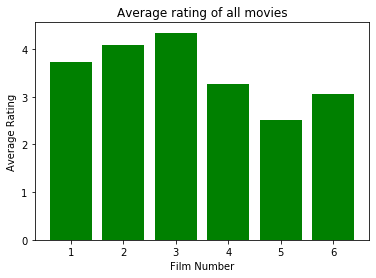

In [14]:
# Task 2: Data Exploration
# 1. Explore the survey question: {Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.	(Star Wars: Episode I  The Phantom Menace; Star Wars: Episode II  Attack of the Clones; Star Wars: Episode III  Revenge of the Sith;	Star Wars: Episode IV  A New Hope; Star Wars: Episode V The Empire Strikes Back; Star Wars: Episode VI Return of the Jedi)}, then analysis how people rate Star Wars Movies. 
#Code goes after this line by adding cells

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


#Plotting Average rating of all movies
df = copy.query('rate_ep1 != \'Not seen starwars\' & rate_ep2 != \'Not seen starwars\' & rate_ep3 != \'Not seen starwars\' & rate_ep4 != \'Not seen starwars\' & rate_ep5 != \'Not seen starwars\' & rate_ep6 != \'Not seen starwars\' ')
mean1 = df[df.columns[9:15]].mean()
plt.bar(range(1,7), mean1, color='g')
plt.xlabel("Film Number")
plt.ylabel("Average Rating")
plt.title("Average rating of all movies")
plt.show()


Text(0.5, 1.0, 'Percentage of people rating for Episode 1')

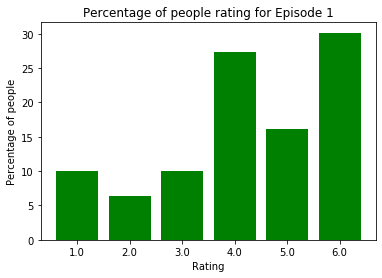

In [15]:
#Dataframe of people who have seen all the starwars movie.
sw = copy.query('seen_ep1 == \'Yes\' & seen_ep2 == \'Yes\' & seen_ep3 == \'Yes\'& seen_ep4 == \'Yes\' & seen_ep5 == \'Yes\' & seen_ep6 == \'Yes\'')

#Plotting Perrcentage Bar Graph Rating of Episode 1
ep1_counts=sw["rate_ep1"].value_counts()
per_ep1=[ep1_counts[1.0]*100/471,ep1_counts[2.0]*100/471,ep1_counts[3.0]*100/471,ep1_counts[4.0]*100/471,ep1_counts[5.0]*100/471,ep1_counts[6.0]*100/471]
plt.bar(list(range(6)),per_ep1,color='g',align='center')
plt.xticks(list(range(6)),['1.0','2.0','3.0','4.0','5.0','6.0'])
plt.xlabel('Rating')
plt.ylabel('Percentage of people')
plt.title('Percentage of people rating for Episode 1')

Text(0.5, 1.0, 'Percentage of people rating for Episode 2')

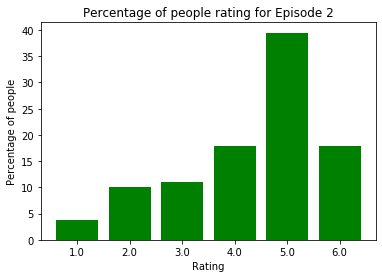

In [16]:
#Plotting Perrcentage Bar Graph Rating of Episode 2
ep2_counts=sw["rate_ep2"].value_counts()
per_ep2=[ep2_counts[1.0]*100/471,ep2_counts[2.0]*100/471,ep2_counts[3.0]*100/471,ep2_counts[4.0]*100/471,ep2_counts[5.0]*100/471,ep2_counts[6.0]*100/471]
plt.bar(list(range(6)),per_ep2,color='g',align='center')
plt.xticks(list(range(6)),['1.0','2.0','3.0','4.0','5.0','6.0'])
plt.xlabel('Rating')
plt.ylabel('Percentage of people')
plt.title('Percentage of people rating for Episode 2')

Text(0.5, 1.0, 'Percentage of people rating for Episode 3')

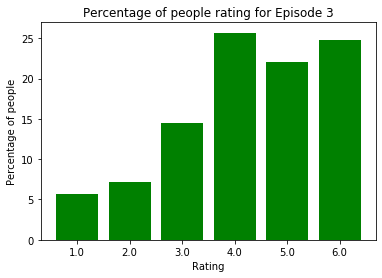

In [17]:
#Plotting Perrcentage Bar Graph Rating of Episode 3
ep3_counts=sw["rate_ep3"].value_counts()
per_ep3=[ep3_counts[1.0]*100/471,ep3_counts[2.0]*100/471,ep3_counts[3.0]*100/471,ep3_counts[4.0]*100/471,ep3_counts[5.0]*100/471,ep3_counts[6.0]*100/471]
plt.bar(list(range(6)),per_ep3,color='g',align='center')
plt.xticks(list(range(6)),['1.0','2.0','3.0','4.0','5.0','6.0'])
plt.xlabel('Rating')
plt.ylabel('Percentage of people')
plt.title('Percentage of people rating for Episode 3')

Text(0.5, 1.0, 'Percentage of people rating for Episode 4')

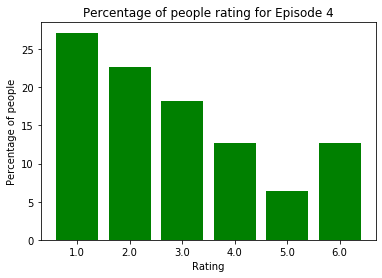

In [18]:
#Plotting Perrcentage Bar Graph Rating of Episode 4
ep4_counts=sw["rate_ep4"].value_counts()
per_ep4=[ep4_counts[1.0]*100/471,ep4_counts[2.0]*100/471,ep4_counts[3.0]*100/471,ep4_counts[4.0]*100/471,ep4_counts[5.0]*100/471,ep4_counts[6.0]*100/471]
plt.bar(list(range(6)),per_ep4,color='g',align='center')
plt.xticks(list(range(6)),['1.0','2.0','3.0','4.0','5.0','6.0'])
plt.xlabel('Rating')
plt.ylabel('Percentage of people')
plt.title('Percentage of people rating for Episode 4')

Text(0.5, 1.0, 'Percentage of people rating for Episode 5')

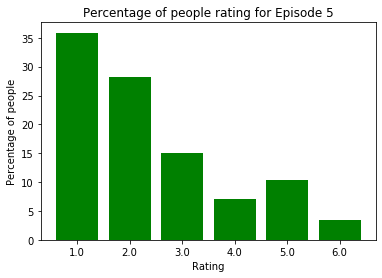

In [19]:
#Plotting Perrcentage Bar Graph Rating of Episode 5
ep5_counts=sw["rate_ep5"].value_counts()
per_ep5=[ep5_counts[1.0]*100/471,ep5_counts[2.0]*100/471,ep5_counts[3.0]*100/471,ep5_counts[4.0]*100/471,ep5_counts[5.0]*100/471,ep5_counts[6.0]*100/471]
plt.bar(list(range(6)),per_ep5,color='g',align='center')
plt.xticks(list(range(6)),['1.0','2.0','3.0','4.0','5.0','6.0'])
plt.xlabel('Rating')
plt.ylabel('Percentage of people')
plt.title('Percentage of people rating for Episode 5')

Text(0.5, 1.0, 'Percentage of people rating for Episode 6')

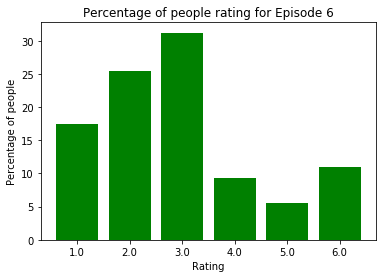

In [20]:
#Plotting Perrcentage Bar Graph Rating of Episode 6
ep6_counts=sw["rate_ep6"].value_counts()
per_ep6=[ep6_counts[1.0]*100/471,ep6_counts[2.0]*100/471,ep6_counts[3.0]*100/471,ep6_counts[4.0]*100/471,ep6_counts[5.0]*100/471,ep6_counts[6.0]*100/471]
plt.bar(list(range(6)),per_ep6,color='g',align='center')
plt.xticks(list(range(6)),['1.0','2.0','3.0','4.0','5.0','6.0'])
plt.xlabel('Rating')
plt.ylabel('Percentage of people')
plt.title('Percentage of people rating for Episode 6')

Text(0.5, 1.0, 'Percentage of fans VS Sex')

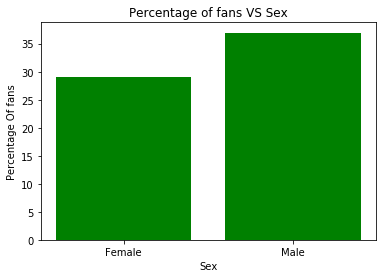

In [21]:
# Task 2: Data Exploration
# 2. Explore the relationships between columns; at least 3 visualisations with plausible hypothesis

#Code goes after this line by adding cells

#Plotting Sex VS Fan of starwars
sex_counts=copy["gender"].value_counts()
mask_female=copy["gender"]=='Female'
mask_male=copy["gender"]=='Male'

f_fan= copy.loc[mask_female,'fan_starwars'].value_counts()
m_fan= copy.loc[mask_male,'fan_starwars'].value_counts()
rate=[f_fan[0]*100/float(f_fan[0]+f_fan[1]+m_fan[0]+m_fan[1]),m_fan[0]*100/float(m_fan[0]+m_fan[1]+f_fan[0]+f_fan[1])]
plt.bar(list(range(2)),rate,color='g',align='center')
plt.xticks(list(range(2)),['Female','Male'])
plt.xlabel('Sex')
plt.ylabel('Percentage Of fans')
plt.title('Percentage of fans VS Sex')

Text(0, 0.5, 'Number of seen')

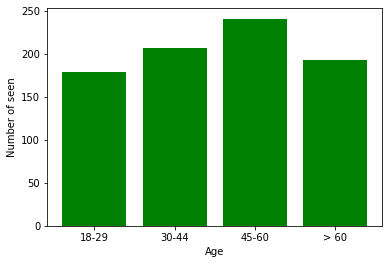

In [22]:
#Plotting Age VS Seen any of the moive

age_counts=copy["age"].value_counts()
mask_18to29=copy["age"]=='18-29'
mask_30to44=copy["age"]=='30-44'
mask_45to60=copy["age"]=='45-60'
mask_60ormore=copy["age"]=='> 60'

seen_18to29= copy.loc[mask_18to29,'seen_any'].value_counts()
seen_30to44= copy.loc[mask_30to44,'seen_any'].value_counts()
seen_45to60= copy.loc[mask_45to60,'seen_any'].value_counts()
seen_60ormore= copy.loc[mask_60ormore,'seen_any'].value_counts()

rate=[seen_18to29[0],seen_30to44[0],seen_45to60[0],seen_60ormore[0]]
plt.bar(list(range(4)),rate,color='g',align='center')
plt.xticks(list(range(4)),['18-29','30-44','45-60','> 60'])
plt.xlabel('Age')
plt.ylabel('Number of seen')


Text(0, 0.5, 'Number of fans')

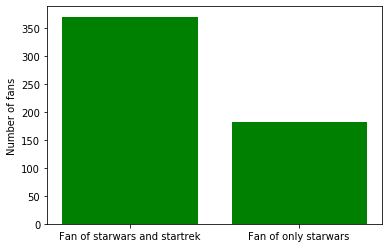

In [23]:
#Plotting people who are fan of star wars and fan of star trek

fan_startrek_counts=copy["fan_startrek"].value_counts()

mask_fan_startrek=copy["fan_startrek"]=='Yes'
mask_not_fan_startrek=copy["fan_startrek"]=='No'

fan_starwars_startrek= copy.loc[mask_fan_startrek,'fan_starwars'].value_counts()
fan_starwars_not_startrek= copy.loc[mask_not_fan_startrek,'fan_starwars'].value_counts()

count_fans=[fan_starwars_startrek['Yes'],fan_starwars_not_startrek['Yes']]
plt.bar(list(range(2)),count_fans,color='g',align='center')
plt.xticks(list(range(2)),['Fan of starwars and startrek','Fan of only starwars'])
plt.ylabel('Number of fans')

Text(0.5, 1.0, 'Male VS Darth Vader character rating')

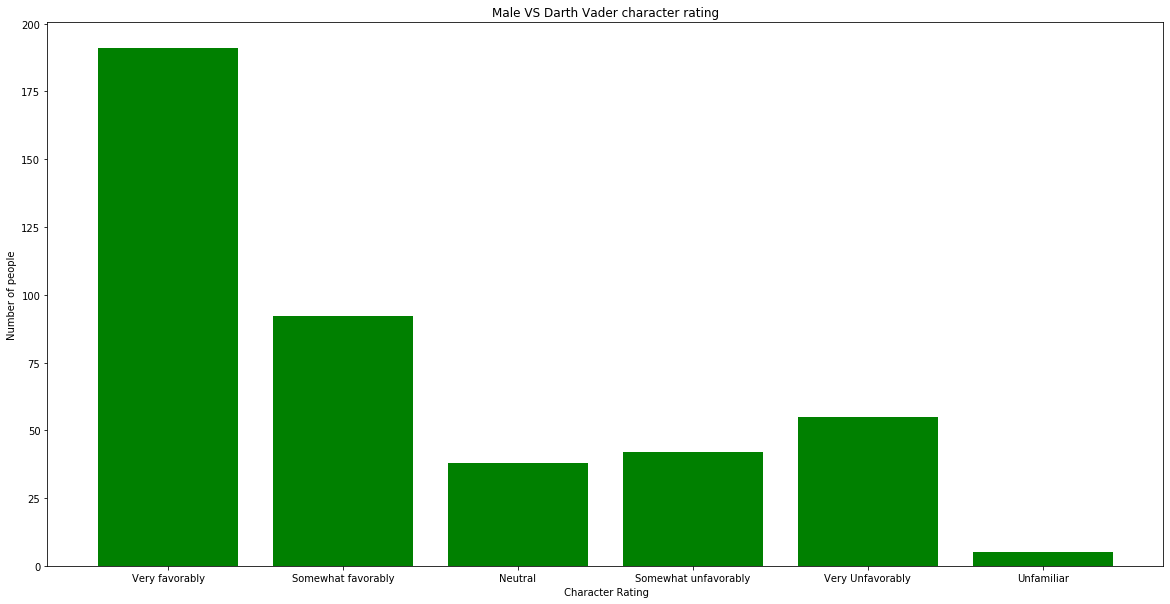

In [24]:
# Task 2: Data Exploration
# 3. Explore whether there are relationship between people's demographics (Gender, Age, Household Income, Education, Location) and their attitude to Start War characters. 

#Code goes after this line by adding cells

#Gender VS Darth Vader Rating

darth_vf_mask = copy["rate_darth"]== 'Very favorably'
darth_sf_mask = copy["rate_darth"]== 'Somewhat favorably'
darth_nf_mask = copy["rate_darth"]== 'Neither favorably nor unfavorably (neutral)'
darth_su_mask = copy["rate_darth"]== 'Somewhat unfavorably'
darth_vu_mask = copy["rate_darth"]== 'Very unfavorably'
darth_uf_mask = copy["rate_darth"]== 'Unfamiliar (N/A)'

darth_vf = copy.loc[darth_vf_mask,'gender'].value_counts()
darth_sf = copy.loc[darth_sf_mask,'gender'].value_counts()
darth_nf = copy.loc[darth_nf_mask,'gender'].value_counts()
darth_su = copy.loc[darth_su_mask,'gender'].value_counts()
darth_vu = copy.loc[darth_vu_mask,'gender'].value_counts()
darth_uf = copy.loc[darth_uf_mask,'gender'].value_counts()

#Male rating darth vader

rate2 = [darth_vf["Male"], darth_sf["Male"], darth_nf["Male"], darth_su["Male"],darth_vu["Male"], darth_uf["Male"]]
plt.figure(figsize=(20,10))
plt.bar(list(range(6)), rate2, color='g', align='center')
plt.xticks(list(range(6)),['Very favorably','Somewhat favorably','Neutral','Somewhat unfavorably','Very Unfavorably','Unfamiliar'])
plt.xlabel(' Character Rating')
plt.ylabel('Number of people')
plt.title('Male VS Darth Vader character rating')

Text(0.5, 1.0, 'Female VS Darth Vader character rating')

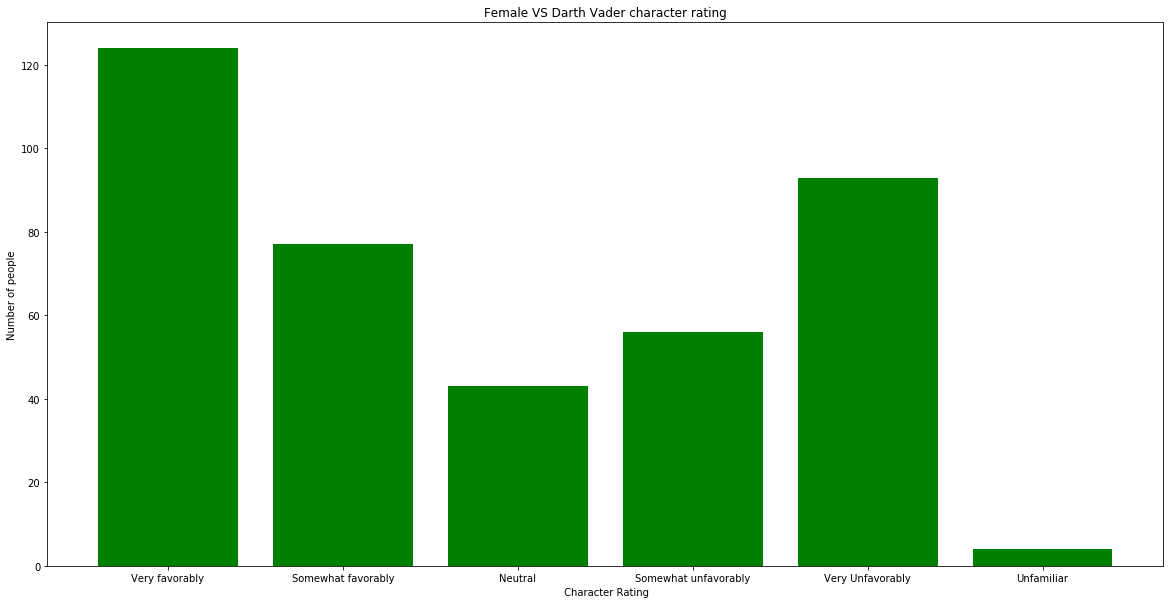

In [25]:
#Female rating darth vader

rate3 = [darth_vf["Female"], darth_sf["Female"], darth_nf["Female"], darth_su["Female"],darth_vu["Female"], darth_uf["Female"]]
plt.figure(figsize=(20,10))
plt.bar(list(range(6)), rate3, color='g', align='center')
plt.xticks(list(range(6)),['Very favorably','Somewhat favorably','Neutral','Somewhat unfavorably','Very Unfavorably','Unfamiliar'])
plt.xlabel(' Character Rating')
plt.ylabel('Number of people')
plt.title('Female VS Darth Vader character rating')